# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


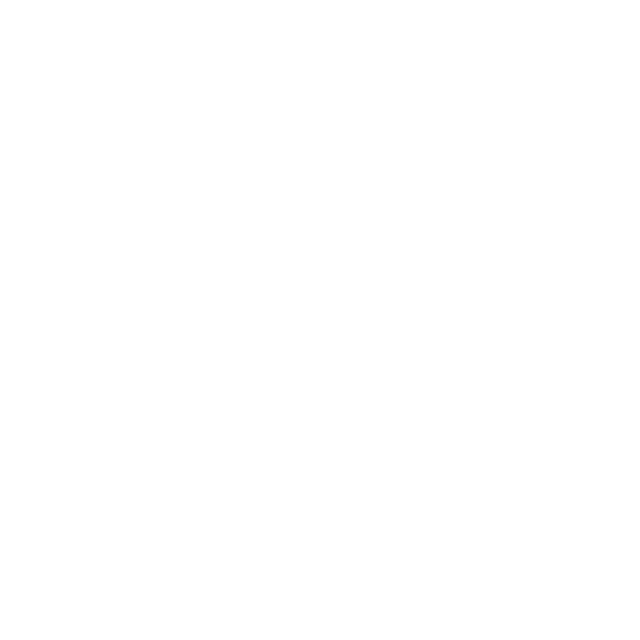

In [178]:
%matplotlib notebook
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [179]:
df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(400))
df.head(1)

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0,5.579578e+06,2.816905e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...


<IPython.core.display.Javascript object>


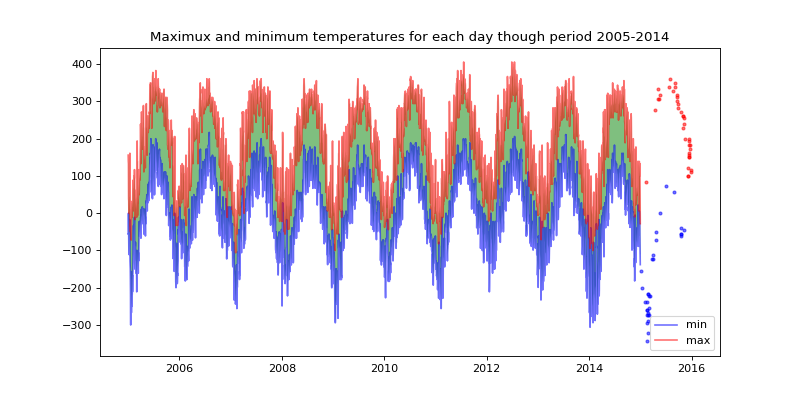

In [180]:
"""write some python code which returns a line graph of the record high and
record low temperatures by day of the year over the period 2005-2014. 
The area between the record high and record low temperatures for each day should be shaded"""

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
plt.rcParams.update({'figure.max_open_warning': 0})

plt.figure(figsize=(10,5))

# get maximum and minimum temperature values - for date < 2015-01-01 - for each day 
df_max = df[df['Element'] == 'TMAX']
df_max = df_max[df_max['Date'] < '2015-01-01']
max_day_temp = df_max.groupby(by='Date')['Data_Value'].agg(max).to_frame().reset_index()
# convert dates from string to datetime dtype
max_day_temp['Date'] = pd.to_datetime(max_day_temp['Date'], infer_datetime_format=True)

df_min = df[df['Element'] == 'TMIN']
df_min = df_min[df_min['Date'] < '2015-01-01']
min_day_temp = df_min.groupby(by='Date')['Data_Value'].agg(min).to_frame().reset_index()
min_day_temp['Date'] = pd.to_datetime(min_day_temp['Date'], infer_datetime_format=True)

# plot minimum and maximum day temps in 2005-2014 period
plt.plot(min_day_temp['Date'].values, min_day_temp['Data_Value'].values, '-b', max_day_temp['Date'].values, max_day_temp['Data_Value'].values, '-r', alpha=0.55)
plt.title('Maximux and minimum temperatures for each day though period 2005-2014')
plt.legend(['min', 'max'])

plt.gca().fill_between(min_day_temp['Date'].values, min_day_temp['Data_Value'].values, max_day_temp['Data_Value'].values, facecolor='g', alpha=0.5)



In [181]:
"""Overlay a scatter of the 2015 data for any points (highs and lows) for
which the ten year record (2005-2014) record high or record low was broken in 2015."""
# get month and date from date and group df by month and date. Value of 'Data_Value' column is record day temperature for 2005-2014 period
max_day_temp['m'] = max_day_temp['Date'].dt.month
max_day_temp['d'] = max_day_temp['Date'].dt.day
max_day_temp_gr = max_day_temp.groupby(by=['m', 'd']).agg({'Data_Value':max}).reset_index()

min_day_temp['m'] = min_day_temp['Date'].dt.month
min_day_temp['d'] = min_day_temp['Date'].dt.day
min_day_temp_gr = min_day_temp.groupby(by=['m', 'd']).agg({'Data_Value':min}).reset_index()

# plt.figure()

# get maximum and minimum temperature values - for date >= 2015-01-01 - for each day 
df_max_2015 = df[df['Element'] == 'TMAX']
df_max_2015 = df_max_2015[df_max_2015['Date'] >= '2015-01-01']
max_day_temp_2015 = df_max_2015.groupby(by='Date')['Data_Value'].agg(max).to_frame().reset_index() # df
# get dates
max_day_temp_2015['Date'] = pd.to_datetime(max_day_temp_2015['Date'], infer_datetime_format=True)

df_min_2015 = df[df['Element'] == 'TMIN']
df_min_2015 = df_min_2015[df_min_2015['Date'] >= '2015-01-01']
min_day_temp_2015 = df_min_2015.groupby(by='Date')['Data_Value'].agg(min).to_frame().reset_index()
min_day_temp_2015['Date'] = pd.to_datetime(min_day_temp_2015['Date'], infer_datetime_format=True)

# scatter min and max 2015 day temp values
# plt.scatter(min_day_temp_2015['Date'].values, min_day_temp_2015['Data_Value'].values, c='blue', label='min_day_temps_2015', alpha=0.55)
# plt.scatter(max_day_temp_2015['Date'].values, max_day_temp_2015['Data_Value'].values, c='red', label='max_day_temps_2015', alpha=0.55)

max_day_temp_2015['m'] = max_day_temp_2015['Date'].dt.month
max_day_temp_2015['d'] = max_day_temp_2015['Date'].dt.day
min_day_temp_2015['m'] = min_day_temp_2015['Date'].dt.month
min_day_temp_2015['d'] = min_day_temp_2015['Date'].dt.day

max_day_temp_2015.head()

,Date,Data_Value,m,d
0,2015-01-01,11,1,1
1,2015-01-02,39,1,2
2,2015-01-03,39,1,3
3,2015-01-04,44,1,4
4,2015-01-05,28,1,5


In [182]:
j_min = min_day_temp_gr.set_index(['m', 'd']).join(min_day_temp_2015.set_index(['m', 'd']), lsuffix='\'05-14', rsuffix='\'15')
j_max = max_day_temp_gr.set_index(['m', 'd']).join(max_day_temp_2015.set_index(['m', 'd']), lsuffix='\'05-14', rsuffix='\'15')

# get points (highs and lows) for which the ten year record (2005-2014) was broken in 2015.
record_mins = j_min[j_min["Data_Value'05-14"] > j_min["Data_Value'15"]]
record_maxs = j_max[j_max["Data_Value'05-14"] < j_max["Data_Value'15"]] 
record_maxs.head()

Data_Value'05-14       Date  Data_Value'15
m d                                             
2 9                 78 2015-02-09           83.0
4 17               244 2015-04-17          278.0
5 7                256 2015-05-07          306.0
  8                317 2015-05-08          333.0
  11               294 2015-05-11          306.0

In [183]:
# scatter min and max 2015 day temp values
plt.scatter(record_mins['Date'].values, record_mins["Data_Value'15"].values, c='blue', label='min_day_temps_2015', s=7, alpha=0.55)
plt.scatter(record_maxs['Date'].values, record_maxs["Data_Value'15"].values, c='red', label='max_day_temps_2015', s=7, alpha=0.55)